In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Teja\Documents\teja intern prodigyy\TASK 4\LabeledText.csv', encoding='latin1') 

In [4]:
df


,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive
...,...,...,...
4864,995.txt,OMG. Well done #Eskom! 'Man dies during #LoadS...,positive
4865,996.txt,Feelin' the love in here! #ValentinesDay #caring,positive
4866,997.txt,#blue #eyes can't be #beaten,neutral
4867,998.txt,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,neutral


In [5]:
print(df.head()) 

  File Name                                            Caption     LABEL
0     1.txt      How I feel today #legday #jelly #aching #gym   negative
1    10.txt  @ArrivaTW absolute disgrace two carriages from...  negative
2   100.txt  This is my Valentine's from 1 of my nephews. I...  positive
3  1000.txt  betterfeelingfilms: RT via Instagram: First da...   neutral
4  1001.txt         Zoe's first love #Rattled @JohnnyHarper15   positive


In [6]:
print(df.isnull().sum()) 

File Name    0
Caption      0
LABEL        0
dtype: int64


In [7]:
df = df.dropna() 

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

In [9]:
nltk.download('stopwords')
nltk.download('wordnet') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Teja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Teja\AppData\Roaming\nltk_data...


True

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 

In [11]:
def preprocess_text(text):
    text = re.sub(r'#\w+', '', text)  
    text = re.sub(r'@\w+', '', text)  
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)  
    text = text.lower()  
    text = text.split() 
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]  
    return ' '.join(text)


In [12]:
df['Processed_Caption'] = df['Caption'].apply(preprocess_text) 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['Processed_Caption']).toarray()
y = df['LABEL'] 

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.6396303901437371
Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.54      0.61       284
     neutral       0.56      0.73      0.63       367
    positive       0.74      0.63      0.68       323

    accuracy                           0.64       974
   macro avg       0.66      0.63      0.64       974
weighted avg       0.66      0.64      0.64       974



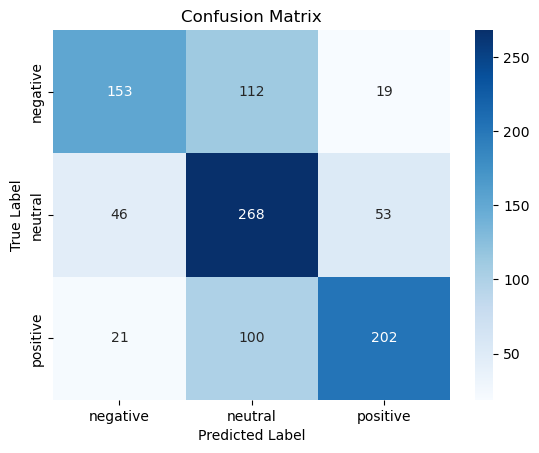

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


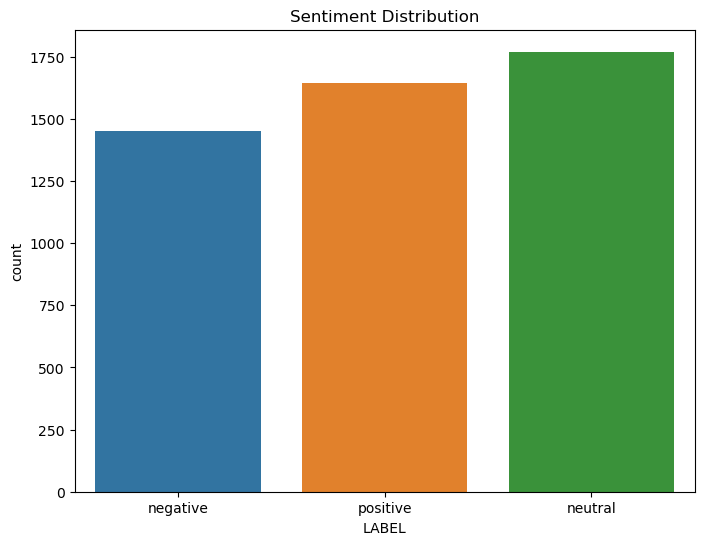

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='LABEL')
plt.title('Sentiment Distribution')
plt.show()


Top Positive Features: ['feeling', 'quiz', 'dead', 'petrified', 'death', 'devastated', 'distressed', 'fear', 'wrong', 'hurt']
Top Negative Features: ['love', 'like', 'great', 'good', 'finished', 'excited', 'beautiful', 'flustered', 'happy', 'best']


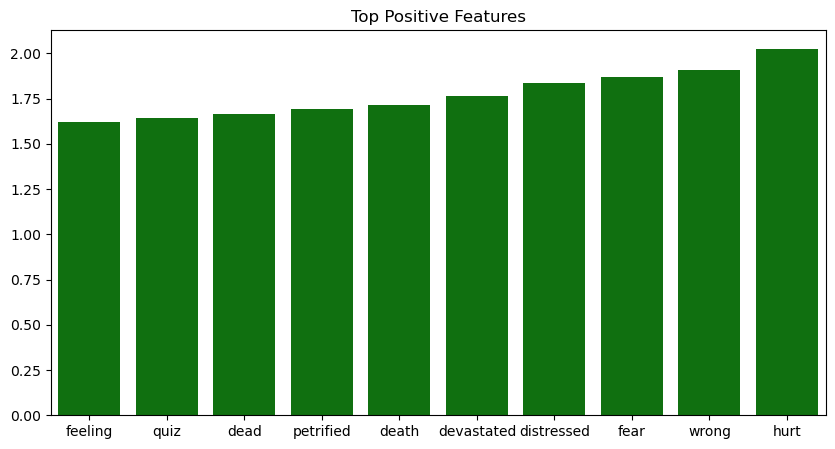

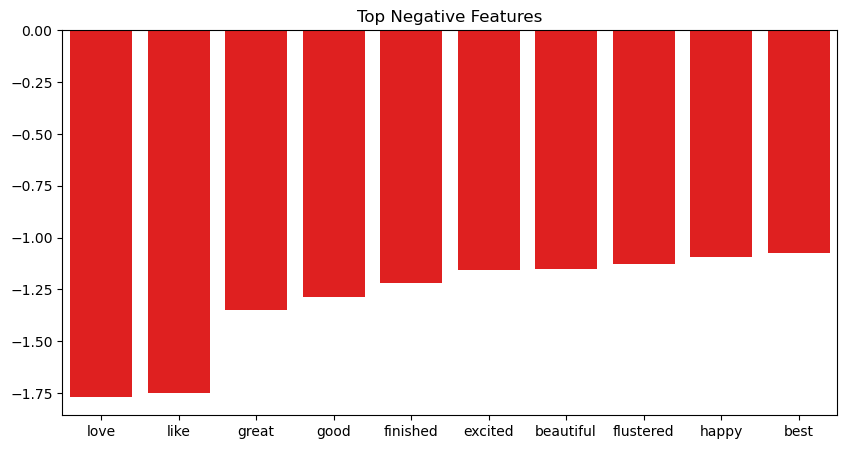

In [19]:
feature_names = tfidf_vectorizer.get_feature_names_out()
coefs = model.coef_[0]
top_positive_indices = np.argsort(coefs)[-10:]
top_negative_indices = np.argsort(coefs)[:10]

top_positive_features = [feature_names[i] for i in top_positive_indices]
top_negative_features = [feature_names[i] for i in top_negative_indices]

print('Top Positive Features:', top_positive_features)
print('Top Negative Features:', top_negative_features)

plt.figure(figsize=(10,5))
sns.barplot(x=top_positive_features, y=coefs[top_positive_indices], color='green')
plt.title('Top Positive Features')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=top_negative_features, y=coefs[top_negative_indices], color='red')
plt.title('Top Negative Features')
plt.show() 